In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
data_set = "./usedcars.csv"
df = pd.read_csv(data_set)

In [4]:
lm = LinearRegression()

In [5]:
X = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
Y = df["price"]
lm.fit(X, Y)

LinearRegression()

In [6]:
Yhat = lm.predict(X)
Yhat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [7]:
intercept = lm.intercept_
slope = lm.coef_

print(f"Yhat = {intercept} + {slope} * X")

Yhat = -15806.62462632923 + [53.49574423  4.70770099 81.53026382 36.05748882] * X


In [8]:
# Creating a linear model lm2 where response is 'price' and predictor variable is normalized loss and highway-mpg
lm2 = LinearRegression()
x1 = df[['normalized-losses', 'highway-mpg']]
y1 = df['price']

lm2.fit(x1, y1)

LinearRegression()

In [9]:
yhat = lm2.predict(x1)

In [10]:
slope = lm2.coef_
intr = lm2.intercept_

## Model Evaluation

In [11]:
# Model evaluation
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Graph of price vs highway-mpg')

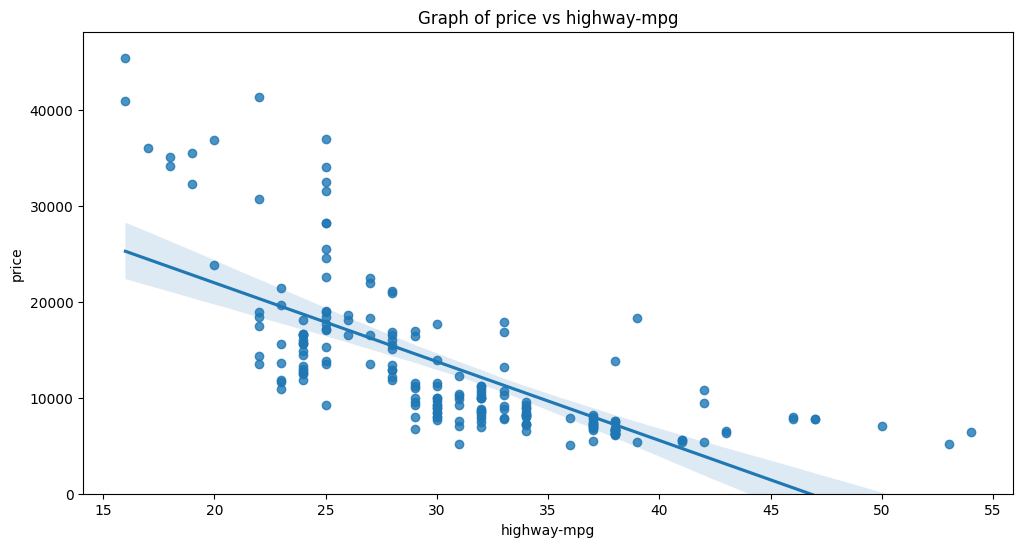

In [12]:
width = 12
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.title("Graph of price vs highway-mpg")

(0.0, 47414.1)

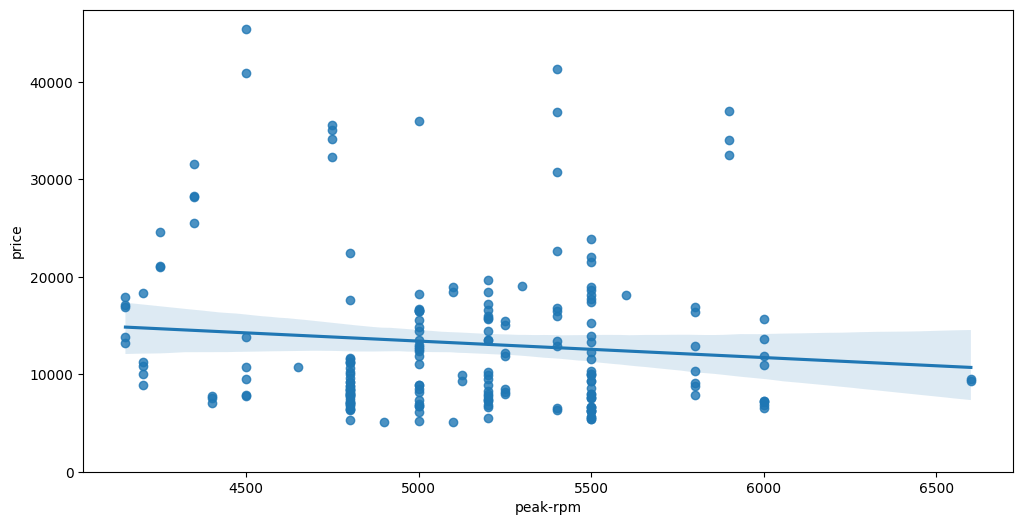

In [13]:
# Graph of price vs peak rpm
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0, )

In [14]:
# Finding the correlation between the three i.e peak-rpm, highway-mpg, price
df[['highway-mpg', 'peak-rpm', 'price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

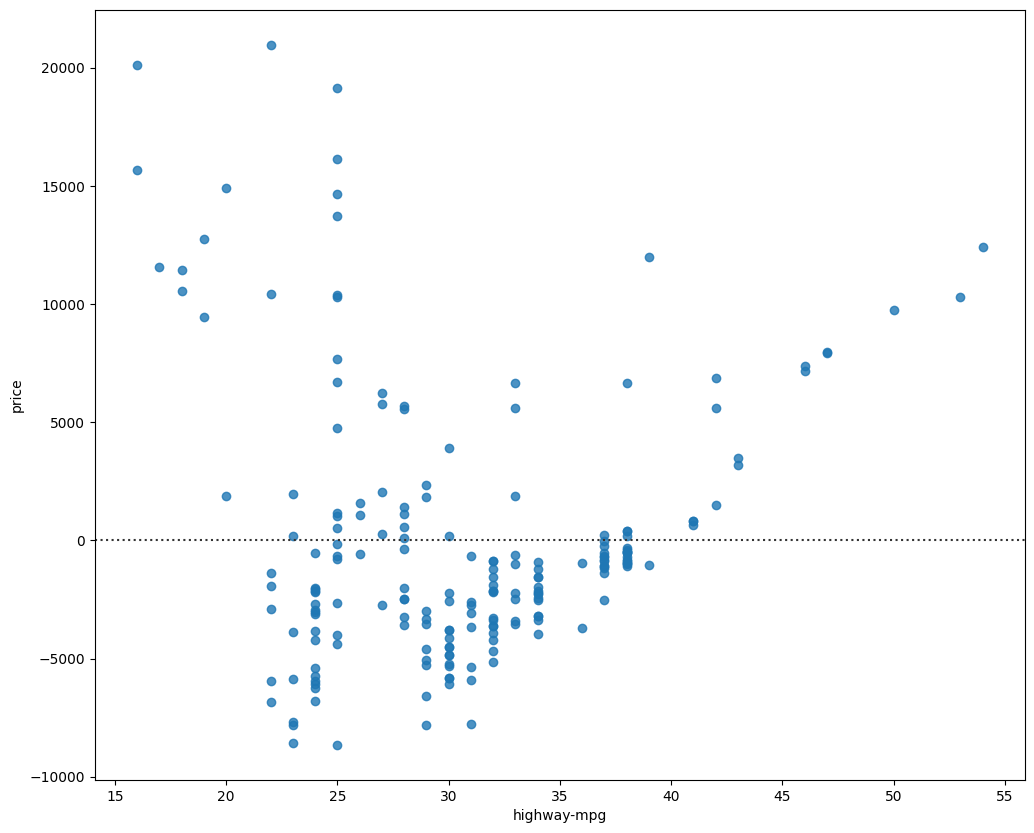

In [15]:
# Now plotting the residue plot which is the difference between the y(given) and yhat(predicted)
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show 

In [16]:
X.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22


C:\Users\Mohammad Soban\AppData\Local\Temp\ipykernel_3700\3065843008.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color='b', label="Actual Values")
C:\Users\Mohammad Soban\AppData\Local\Temp\ipykernel_3700\3065843008.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

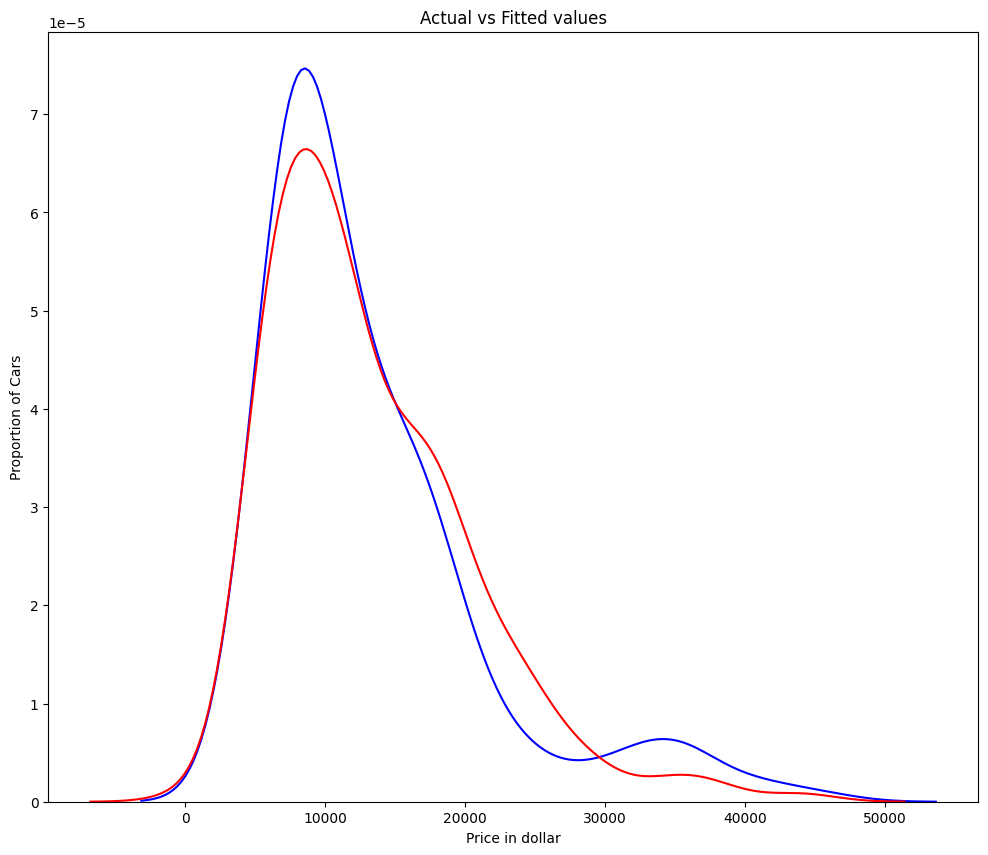

In [17]:
Y_hat = lm.predict(X)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color='b', label="Actual Values")
sns.distplot(Y_hat, hist=False, color='r', label="Fitted Values", ax=ax1)

plt.title("Actual vs Fitted values")
plt.xlabel("Price in dollar")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

In [18]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [19]:
x = df['highway-mpg']
y = df['price']

In [20]:
# polyfit function fits the polynomial of degree 3 here to the points x and y
f = np.polyfit(x, y, 3)

# poly1d function is a 1D function helps to define a polynomial function. It makes it easy to apply “natural operations” on polynomials and store it in p
p = np.poly1d(f)

print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


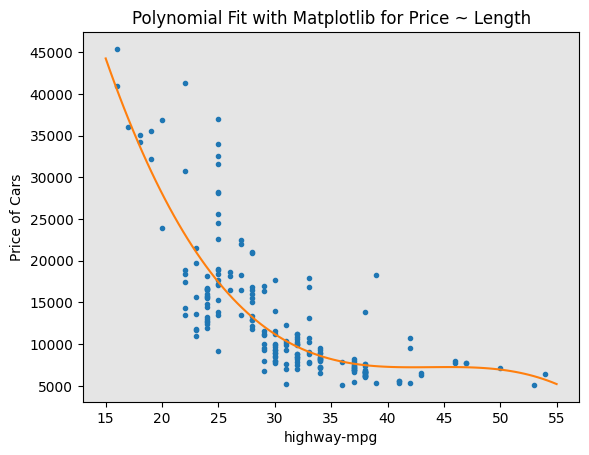

In [21]:
PlotPolly(p, x, y, 'highway-mpg')

In [22]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [23]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [24]:
X.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22


In [25]:
X_pr = pr.fit_transform(X)
X.shape

(201, 4)

In [26]:
X_pr.shape

(201, 15)

## PipeLine

In [27]:
X = X.astype(float)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [30]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [31]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [32]:
ypipe = pipe.predict(X)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [33]:
# Write your code below and press Shift+Enter to execute 
Input=[('scale',StandardScaler()), ('model',LinearRegression())]
pipe=Pipeline(Input)

pipe.fit(X, y)

ypipe=pipe.predict(X)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [34]:
# calculating the R2 value for the following evaluation
lm.fit(X, Y)
print("The R-squared value for the following is :- ", lm.score(X, Y))

The R-squared value for the following is :-  0.8093562806577457


In [35]:
Y_hat = lm.predict(X)
print("The output for the prdeicted value is ", Y_hat[0:4])

The output for the prdeicted value is  [13699.11161184 13699.11161184 19051.65470233 10620.36193015]


In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Y_hat)
print("MSE ", mse)

MSE  11980366.87072649


In [38]:
# For the multiple linear model 
lm.fit(X, df['price'])

print(f"The R-square is :- {lm.score(X, df['price'])}")

The R-square is :- 0.8093562806577457


In [40]:
Y_predict_multifit = lm.predict(X)
print("MSE price and predicted value is ", mean_squared_error(df['price'], Y_predict_multifit))


MSE price and predicted value is  11980366.87072649


In [42]:
# For polynomial fit data
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print("The R-score value is :- " , r_squared)

The R-score value is :-  0.674194666390652


In [44]:
mse2 = mean_squared_error(df['price'], p(x))
mse2

20474146.426361218

In [45]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [50]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
lm

LinearRegression()

In [52]:
yhat = lm.predict(new_input)
yhat[0:4]


c:\Python_3.10.2\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 4 features as input.